# Rocket Propulsion Analysis
Matthew Simpson 
<br />Fall 2023

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import aerokit.aero.Isentropic as Is
import aerokit.aero.MassFlow   as mf
from scipy.optimize import minimize

plt.rcParams["figure.dpi"] = 120
print(ct.__version__)

3.0.0


## Determination of the Adiabatic Flame Temperature Across a Range of Equivelance Ratios

The kerosene mechanism was gathered from 
<a href="https://www.cerfacs.fr/cantera/docs/mechanisms/kerosene-air/Luche/These_LUCHE.pdf">
"Obtaining reduced kinetic models of combustion Application to a kerosene mechanism"
</a><br />
The ethanol mechanism was gathered from 
<a href="https://pubs.acs.org/doi/10.1021/acs.energyfuels.9b03314">
"A New Detailed Ethanol Kinetic Mechanism at Engine-Relevant Conditions"
</a>

### Asumptions
* By holding H and P constant during <span style="color:DodgerBlue">gas.equilibrate("HP")</span>, the adiabatic temperature is found
* The fuels are simplifed from their long chain represnetations for use in the stoiciometric ratio




In [2]:
molar_mass_CH4 = 16.04
molar_mass_O2 = 32.00
stoichiometric_ratio = 2

equivalence_ratio_methane = np.linspace(0,3, 100)
gas = ct.Solution('gri30.yaml')
gox = "O2:1"
methane = "CH4:1"

Adiabatic_flame_temp = np.zeros(equivalence_ratio_methane.shape)
gamma_mix = np.zeros(equivalence_ratio_methane.shape)
MW_mix = np.zeros(equivalence_ratio_methane.shape)
R = np.zeros(equivalence_ratio_methane.shape)
for i in range(len(equivalence_ratio_methane)):
    gas.TP = 300, 179908
    gas.set_equivalence_ratio(equivalence_ratio_methane[i] , methane, gox)
    gas.equilibrate("HP") # Adiabatic since holding H constant
    Adiabatic_flame_temp[i] = gas.T
    gamma_mix[i] = gas.cp / gas.cv
    MW_mix[i] = gas.mean_molecular_weight
    R[i] = 8314.5/MW_mix[i]

In [4]:

equivalence_ratio_kerosene = np.linspace(0,3, 100)
gas = ct.Solution('Propulsion/91sp_991re.yaml')
gox = "O2:1"
kerosone = "NC10H22:1"

Adiabatic_flame_temp_kero = np.zeros(equivalence_ratio_kerosene.shape)
gamma_mix_kero = np.zeros(equivalence_ratio_kerosene.shape)
MW_mix_kero = np.zeros(equivalence_ratio_kerosene.shape)
R_kero = np.zeros(equivalence_ratio_kerosene.shape)
for i in range(len(equivalence_ratio_kerosene)):
    gas.TP = 300, 179908
    gas.set_equivalence_ratio(equivalence_ratio_kerosene[i] , kerosone, gox)
    gas.equilibrate("HP") # Adiabatic since holding H constant
    Adiabatic_flame_temp_kero[i] = gas.T
    gamma_mix_kero[i] = gas.cp / gas.cv
    MW_mix_kero[i] = gas.mean_molecular_weight
    R_kero[i] = 8314.5/MW_mix[i]

In [5]:

equivalence_ratio_ethanol = np.linspace(0,3, 100)
gas = ct.Solution('Propulsion/PCRL-Mech1.yaml')
gox = "O2:1"
ethanol = "C2H5OH:1"

Adiabatic_flame_temp_ethanol = np.zeros(equivalence_ratio_ethanol.shape)
gamma_mix_kero = np.zeros(equivalence_ratio_ethanol.shape)
MW_mix_kero = np.zeros(equivalence_ratio_ethanol.shape)
R_kero = np.zeros(equivalence_ratio_ethanol.shape)
for i in range(len(equivalence_ratio_ethanol)):
    gas.TP = 300, 179908
    gas.set_equivalence_ratio(equivalence_ratio_ethanol[i] ,ethanol, gox)
    gas.equilibrate("HP") # Adiabatic since holding H constant
    Adiabatic_flame_temp_ethanol[i] = gas.T
    gamma_mix_kero[i] = gas.cp / gas.cv
    MW_mix_kero[i] = gas.mean_molecular_weight
    R_kero[i] = 8314.5/MW_mix[i]

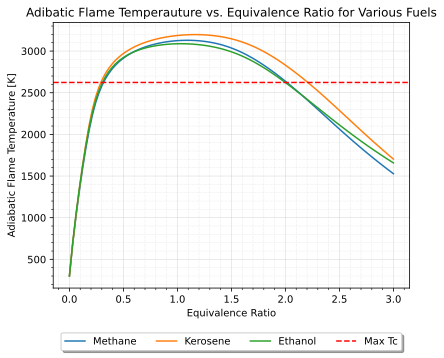

In [6]:
plt.plot(equivalence_ratio_methane, Adiabatic_flame_temp, label='Methane')
plt.plot(equivalence_ratio_kerosene, Adiabatic_flame_temp_kero, label='Kerosene')
plt.plot(equivalence_ratio_ethanol, Adiabatic_flame_temp_ethanol, label='Ethanol')
plt.ylabel("Adiabatic Flame Temperature [K]")
plt.xlabel("Equivalence Ratio")
plt.title('Adibatic Flame Temperauture vs. Equivalence Ratio for Various Fuels')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey')
plt.axhline(y=2623, color='r', linestyle='--',label='Max Tc')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)


## Determination of the Adiabatic Flame Temperature Across a Range of Mixture Ratios

The kerosene mechanism was gathered from 
<a href="https://www.cerfacs.fr/cantera/docs/mechanisms/kerosene-air/Luche/These_LUCHE.pdf">
"Obtaining reduced kinetic models of combustion Application to a kerosene mechanism"
</a><br />
The ethanol mechanism was gathered from 
<a href="https://pubs.acs.org/doi/10.1021/acs.energyfuels.9b03314">
"A New Detailed Ethanol Kinetic Mechanism at Engine-Relevant Conditions"
</a>

### Asumptions
* By holding H and P constant during <span style="color:DodgerBlue">gas.equilibrate("HP")</span>, the adiabatic temperature is found
* The fuels are simplifed from their long chain represnetations for use in the stoiciometric ratio

In [7]:
molar_mass_CH4 = 16.04
molar_mass_O2 = 32.00
stoichiometric_ratio = 2

mixture_ratio_methane = np.linspace(0,12, 100)
equivalence_ratio = mixture_ratio_methane / stoichiometric_ratio
gas = ct.Solution('gri30.yaml')
gox = "O2:1"
methane = "CH4:1"

Adiabatic_flame_temp_methane = np.zeros(mixture_ratio_methane.shape)
gamma_mix_methane = np.zeros(mixture_ratio_methane.shape)
MW_mix_methane = np.zeros(mixture_ratio_methane.shape)
R_methane = np.zeros(mixture_ratio_methane.shape)
for i in range(len(mixture_ratio_methane)):
    gas.TP = 300, 179908
    gas.set_equivalence_ratio(equivalence_ratio[i] , methane, gox)
    gas.equilibrate("HP") # Adiabatic since holding H constant
    Adiabatic_flame_temp_methane[i] = gas.T
    gamma_mix_methane[i] = gas.cp / gas.cv
    MW_mix_methane[i] = gas.mean_molecular_weight
    R_methane[i] = 8314.5/MW_mix_methane[i]

In [9]:
molar_mass_keroseone = 14.02
molar_mass_O2 = 32.00
stoichiometric_ratio = 2.28

mixture_ratio_kerosene = np.linspace(0,12, 100)
equivalence_ratio = mixture_ratio_kerosene  / stoichiometric_ratio
gas = ct.Solution('Propulsion/91sp_991re.yaml')
gox = "O2:1"
kerosone = "NC10H22:1"

Adiabatic_flame_temp_kerosene = np.zeros(mixture_ratio_kerosene .shape)
gamma_mix_kero = np.zeros(mixture_ratio_kerosene.shape)
MW_mix_kero = np.zeros(mixture_ratio_kerosene.shape)
R_kero = np.zeros(mixture_ratio_kerosene.shape)
for i in range(len(mixture_ratio_kerosene)):
    gas.TP = 300, 179908
    gas.set_equivalence_ratio(equivalence_ratio[i] , kerosone, gox)
    gas.equilibrate("HP") # Adiabatic since holding H constant
    Adiabatic_flame_temp_kerosene[i] = gas.T
    gamma_mix_kero[i] = gas.cp / gas.cv
    MW_mix_kero[i] = gas.mean_molecular_weight
    R_kero[i] = 8314.5/MW_mix_kero[i]

In [10]:
molar_mass_ethanol = 46.068
molar_mass_O2 = 32.00
stoichiometric_ratio = 3

mixture_ratio_ethanol = np.linspace(0,12, 100)
equivalence_ratio = mixture_ratio_ethanol / stoichiometric_ratio
gas = ct.Solution('Propulsion/PCRL-Mech1.yaml')
gox = "O2:1"
ethanol = "C2H5OH:1"

Adiabatic_flame_temp_ethanol = np.zeros(mixture_ratio_ethanol.shape)
gamma_mix_ethanol = np.zeros(mixture_ratio_ethanol.shape)
MW_mix_ethanol = np.zeros(mixture_ratio_ethanol.shape)
R_ethanol = np.zeros(mixture_ratio_ethanol.shape)
for i in range(len(mixture_ratio_ethanol)):
    gas.TP = 300, 179908
    gas.set_equivalence_ratio(equivalence_ratio[i] ,ethanol, gox)
    gas.equilibrate("HP") # Adiabatic since holding H constant
    Adiabatic_flame_temp_ethanol[i] = gas.T
    gamma_mix_ethanol[i] = gas.cp / gas.cv
    MW_mix_ethanol[i] = gas.mean_molecular_weight
    R_ethanol[i] = 8314.5/MW_mix_ethanol[i]

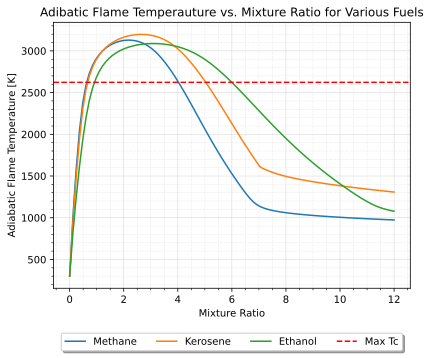

In [11]:
plt.plot(mixture_ratio_methane, Adiabatic_flame_temp_methane, label='Methane')
plt.plot(mixture_ratio_kerosene, Adiabatic_flame_temp_kerosene,label='Kerosene')
plt.plot(mixture_ratio_ethanol, Adiabatic_flame_temp_ethanol,label='Ethanol')
plt.ylabel("Adiabatic Flame Temperature [K]")
plt.xlabel("Mixture Ratio")
plt.title('Adibatic Flame Temperauture vs. Mixture Ratio for Various Fuels')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey')
plt.axhline(y=2623, color='r', linestyle='--',label='Max Tc')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)
plt.savefig("Mixture_Ratio.png", format='png', dpi=300)

## Determination of the Characteristic Velocity C*



$C^* = \sqrt{\frac{RT_c}{\gamma}} \left[ \frac{2}{\gamma+1} \right]^{\frac{-(\gamma+1)}{2(\gamma-1)}}$

R, $\gamma$, and $T_c$ are pulled from the equlibrium condition found using Cantera.

In [12]:
C_star_methane = np.zeros(mixture_ratio_methane.shape)
C_star_kerosene = np.zeros(mixture_ratio_kerosene.shape)
C_star_ethanol = np.zeros(mixture_ratio_ethanol.shape)
for i in range(len(mixture_ratio_methane)): 
    C_star_methane[i] = np.sqrt((R_methane[i] * Adiabatic_flame_temp_methane[i]) / gamma_mix_methane[i]) * ((gamma_mix_methane[i] + 1) / 2) ** ((gamma_mix_methane[i] + 1) / (2 * (gamma_mix_methane[i] - 1)))
    C_star_kerosene[i] = np.sqrt((R_kero[i] * Adiabatic_flame_temp_kerosene[i]) / gamma_mix_kero[i]) * ((gamma_mix_kero[i] + 1) / 2) ** ((gamma_mix_kero[i] + 1) / (2 * (gamma_mix_kero[i] - 1)))
    C_star_ethanol[i] = np.sqrt((R_ethanol[i] * Adiabatic_flame_temp_ethanol[i]) / gamma_mix_ethanol[i]) * ((gamma_mix_ethanol[i] + 1) / 2) ** ((gamma_mix_ethanol[i] + 1) / (2 * (gamma_mix_ethanol[i] - 1)))

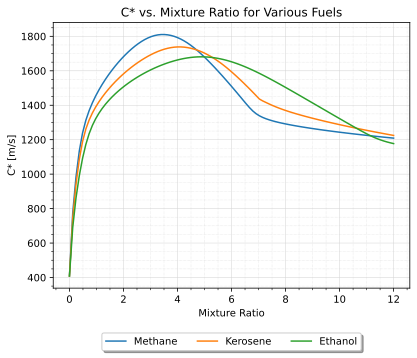

In [13]:
plt.plot(mixture_ratio_methane, C_star_methane, label='Methane')
plt.plot(mixture_ratio_kerosene, C_star_kerosene,label='Kerosene')
plt.plot(mixture_ratio_ethanol, C_star_ethanol,label='Ethanol')
plt.ylabel("C* [m/s]")
plt.xlabel("Mixture Ratio")
plt.title('C* vs. Mixture Ratio for Various Fuels')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)

## Determination of the Maximum Mach Number of the Flow

By performing the optimization script below, values for the throat area, exit pressue, and flow rate can be determined to yeild a thrust of 5000 N. To determine the mach number, equation 4.5 from (Heister, S. D., Anderson, W. E., Pourpoint, T. L., & Cassady, R. J. (2019). Rocket Propulsion.) can be used.

$\frac{P_c}{P} = (1+\frac{\gamma-1}{2}M^2)^\frac{\gamma}{(\gamma-1)}$

Numerical solutions are found using the isentropic flow aerokit python module.

In [38]:
Area_throat = 0.00500
pressure_exit = 101502.2 # pascals
pressure_atmos = 101325
mdot = 2.05323

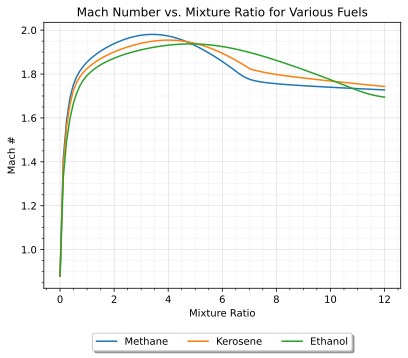

In [39]:
Pc_methane = (C_star_methane * mdot) / Area_throat
Pc_kerosene = (C_star_kerosene * mdot) / Area_throat
Pc_ethanol = (C_star_ethanol * mdot) / Area_throat
Mach_methane = np.zeros(mixture_ratio_ethanol.shape)
Mach_kerosene = np.zeros(mixture_ratio_ethanol.shape)
Mach_ethanol = np.zeros(mixture_ratio_ethanol.shape)
for i in range(len(C_star_methane)):
    Mach_methane[i] = Is.Mach_PtPs(Pc_methane[i]/pressure_exit, gamma_mix_methane[i])
    Mach_kerosene[i] = Is.Mach_PtPs(Pc_kerosene[i]/pressure_exit, gamma_mix_kero[i])
    Mach_ethanol[i] = Is.Mach_PtPs(Pc_ethanol[i]/pressure_exit, gamma_mix_ethanol[i])

plt.plot(mixture_ratio_methane, Mach_methane, label='Methane')
plt.plot(mixture_ratio_kerosene, Mach_kerosene,label='Kerosene')
plt.plot(mixture_ratio_ethanol,Mach_ethanol,label='Ethanol')
plt.ylabel("Mach #")
plt.xlabel("Mixture Ratio")
plt.title('Mach Number vs. Mixture Ratio for Various Fuels')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)


## Determination of the Area Ratio of the Isentropic Nozzle

Using the mach number determined from the above analysis, the area ratio required to reach the desired mach number can be determined as a function of the mach number M, and the ratio of specific heats $\gamma$. Using Equation 4.9 from (Heister, S. D., Anderson, W. E., Pourpoint, T. L., & Cassady, R. J. (2019). Rocket Propulsion.), the area ratio can be determined.

$\frac{A}{A_t} = \frac{1}{M}\left\{ \frac{2+ ( \gamma-1) M^2}{(\gamma+1)} \right\} ^ \frac{\gamma +1 }{2(\gamma-1)}$

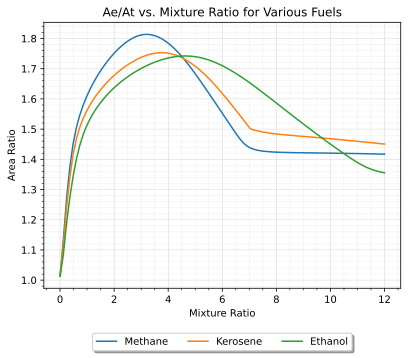

In [40]:
A_over_At_methane = np.zeros(mixture_ratio_methane.shape)
A_over_At_kerosene = np.zeros(mixture_ratio_methane.shape)
A_over_At_ethanol = np.zeros(mixture_ratio_methane.shape)
for i in range(len(mixture_ratio_methane)):
    A_over_At_methane[i] = (1/Mach_methane[i]) * ( ( 2 + (gamma_mix_methane[i]-1)*Mach_methane[i]**2)/(gamma_mix_methane[i]+1))**((gamma_mix_methane[i]+1)/(2*(gamma_mix_methane[i]-1)))
    A_over_At_kerosene[i] = (1/Mach_kerosene[i]) * ( ( 2 + (gamma_mix_kero[i]-1)*Mach_kerosene[i]**2)/(gamma_mix_kero[i]+1))**((gamma_mix_kero[i]+1)/(2*(gamma_mix_kero[i]-1)))
    A_over_At_ethanol[i] = (1/Mach_ethanol[i]) * ( ( 2 + (gamma_mix_ethanol[i]-1)*Mach_ethanol[i]**2)/(gamma_mix_ethanol[i]+1))**((gamma_mix_ethanol[i]+1)/(2*(gamma_mix_ethanol[i]-1)))

plt.plot(mixture_ratio_methane, A_over_At_methane, label='Methane')
plt.plot(mixture_ratio_kerosene, A_over_At_kerosene,label='Kerosene')
plt.plot(mixture_ratio_ethanol,A_over_At_ethanol,label='Ethanol')
plt.ylabel("Area Ratio")
plt.xlabel("Mixture Ratio")
plt.title('Ae/At vs. Mixture Ratio for Various Fuels')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)


## Determination of the Thrust Coefficent of the Nozzle

To determine the nozzle thrust coeffcient, equation 4.33 from (Heister, S. D., Anderson, W. E., Pourpoint, T. L., & Cassady, R. J. (2019). Rocket Propulsion.) can be used. This equation is seperated into multiple parts to streamline debugging.

$c_f = \left[ \frac{2\gamma^2}{\gamma-1} (\frac{2}{\gamma+1}^\frac{\gamma+1}{\gamma-1})(1-(\frac{p_e}{P_c}^\frac{\gamma-1}{\gamma})\right]^\frac{1}{2} + (\frac{p_e}{p_c} - \frac{p_a}{p_c})\epsilon$

This value is normally between 1.8-2.0 for real engines, thus isentropic analysis may yeild higher values due to losses not being taken into account.

Text(0.5, 1.0, 'Cf vs. Mixture Ratio for Various Fuels')

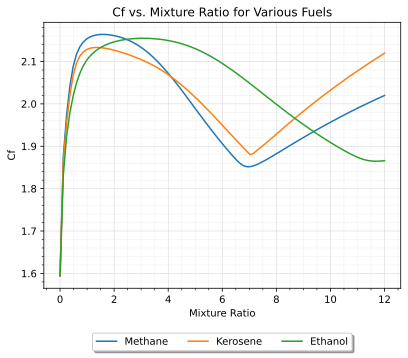

In [41]:
Cf_methane= np.zeros(mixture_ratio_methane.shape)
Cf_kerosene= np.zeros(mixture_ratio_methane.shape)
Cf_ethanol= np.zeros(mixture_ratio_methane.shape)
for i in range(len(C_star_methane)):
   
    a_methane = (2*gamma_mix_methane[i]**2)/(gamma_mix_methane[i]-1)
    b_methane = ((2) / (gamma_mix_methane[i]+1))**((gamma_mix_methane[i]+1)/(gamma_mix_methane[i]-1))
    c_methane = (1 - (pressure_exit/Pc_methane[i]))**((gamma_mix_methane[i]-1)/gamma_mix_methane[i])
    Cf_methane[i] = np.sqrt(a_methane*b_methane*c_methane) + (((pressure_exit/Pc_methane[i]) - (pressure_atmos/Pc_methane[i]))*(A_over_At_methane[i]))

    a_kerosene = (2*gamma_mix_kero[i]**2)/(gamma_mix_kero[i]-1)
    b_kerosene = ((2) / (gamma_mix_kero[i]+1))**((gamma_mix_kero[i]+1)/(gamma_mix_kero[i]-1))
    c_kerosene = (1 - (pressure_exit/Pc_kerosene[i]))**((gamma_mix_kero[i]-1)/gamma_mix_kero[i])
    Cf_kerosene[i] = np.sqrt(a_kerosene*b_kerosene*c_kerosene) + (((pressure_exit/Pc_kerosene[i]) - (pressure_atmos/Pc_kerosene[i]))*(A_over_At_kerosene[i]))

    a_ethanol = (2*gamma_mix_ethanol[i]**2)/(gamma_mix_ethanol[i]-1)
    b_ethanol = ((2) / (gamma_mix_ethanol[i]+1))**((gamma_mix_ethanol[i]+1)/(gamma_mix_ethanol[i]-1))
    c_ethanol = (1 - (pressure_exit/Pc_ethanol[i]))**((gamma_mix_ethanol[i]-1)/gamma_mix_ethanol[i])
    Cf_ethanol[i] = np.sqrt(a_ethanol*b_ethanol*c_ethanol) + (((pressure_exit/Pc_ethanol[i]) - (pressure_atmos/Pc_ethanol[i]))*(A_over_At_ethanol[i]))


plt.plot(mixture_ratio_methane, Cf_methane, label='Methane')
plt.plot(mixture_ratio_kerosene, Cf_kerosene,label='Kerosene')
plt.plot(mixture_ratio_ethanol,Cf_ethanol,label='Ethanol')
plt.ylabel("Cf")
plt.xlabel("Mixture Ratio")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)
plt.title('Cf vs. Mixture Ratio for Various Fuels')

## Determination of the Thrust of the Engine

Using the thrust coefficent from above, the thrust of the engine can be determined by multiplying the value by the chamber pressure and the area, yeilding a value of kg*m/s^2.

$F = c_f P_c A_t$

Text(0.5, 1.0, 'Thrust Force vs. Mixture Ratio for Various Fuels')

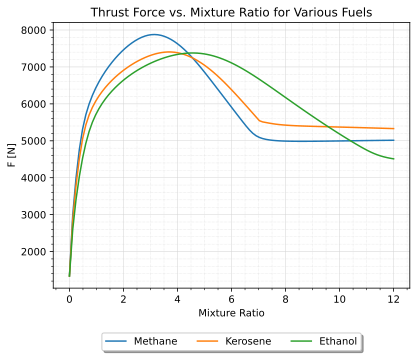

In [42]:
F_methane= np.zeros(mixture_ratio_methane.shape)
F_kerosene= np.zeros(mixture_ratio_methane.shape)
F_ethanol= np.zeros(mixture_ratio_methane.shape)
for i in range(len(C_star_methane)):
    F_methane[i] = Cf_methane[i] * Pc_methane[i] * Area_throat
    F_kerosene[i] = Cf_kerosene[i] * Pc_kerosene[i] * Area_throat
    F_ethanol[i] = Cf_ethanol[i] * Pc_ethanol[i] * Area_throat

plt.plot(mixture_ratio_methane, F_methane, label='Methane')
plt.plot(mixture_ratio_kerosene, F_kerosene,label='Kerosene')
plt.plot(mixture_ratio_ethanol,F_ethanol,label='Ethanol')
plt.ylabel("F [N]")
plt.xlabel("Mixture Ratio")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)
plt.title('Thrust Force vs. Mixture Ratio for Various Fuels')

## Optimization of the Engine

Using the Python Scipy optimization engine, the values for mass flow rate ($\dot{m}$), area of the throat ($A_t$), and nozzle exit pressure ($P_e$), can be moduled from an inital guess until a value of 5000 N is found.

In [44]:
def objective_function(variables):
    try:
        mixture_ratio, Area_throat, pressure_exit, mdot = variables
        F = calculate_F(mixture_ratio, Area_throat, pressure_exit, mdot)
        print(F)
        return abs(F - target_F)
    except Exception as e:
        #print(f"An error occurred: {e}")
        return float('inf')  # Return a large number to signify error in calculation

In [45]:
def calculate_F(mixture_ratio, Area_throat, pressure_exit, mdot):
    pressure_atmos=101325
    molar_mass_CH4 = 16.04
    molar_mass_O2 = 32.00
    stoichiometric_ratio = molar_mass_CH4 / (2 * molar_mass_O2)

    equivalence_ratio = mixture_ratio * stoichiometric_ratio
    gas = ct.Solution('gri30.yaml')
    gox = "O2:1"
    methane = "CH4:1"

    gas.TP = 300, 179908
    gas.set_equivalence_ratio(equivalence_ratio  , methane, gox)
    gas.equilibrate("HP") # Adiabatic since holding H constant
    Adiabatic_flame_temp = gas.T
    gamma_mix = gas.cp / gas.cv
    MW_mix = gas.mean_molecular_weight
    R = 8314.5/MW_mix

    C_star = np.sqrt((R * Adiabatic_flame_temp ) / gamma_mix ) * ((gamma_mix  + 1) / 2) ** ((gamma_mix  + 1) / (2 * (gamma_mix  - 1)))
    Pc = (C_star * mdot) / Area_throat
    Mach = Is.Mach_PtPs(Pc/pressure_exit, gamma_mix)
    A_over_At = (1/Mach) * ( ( 2 + (gamma_mix-1)*Mach**2)/(gamma_mix+1))**((gamma_mix+1)/(2*(gamma_mix-1)))
    a = (2*gamma_mix **2)/(gamma_mix -1)
    b = ((2) / (gamma_mix +1))**((gamma_mix +1)/(gamma_mix -1))
    c = (1 - (pressure_exit/Pc ))**((gamma_mix -1)/gamma_mix )
    Cf  = np.sqrt(a*b*c) + (((pressure_exit/Pc ) - (pressure_atmos/Pc ))*(A_over_At ))
    F = Cf * Pc * Area_throat

    return F


In [48]:
target_F = 5000

bounds = [(0, 6),  # mixture_ratio
          (0.005, 0.065),  # Area_throat
          (50000, 110000),  # pressure_exit
          (1, 5)]  # mdot

# Initial guess 
initial_guess = [0.8, 0.005, 101325, 1.65]

result = minimize(objective_function, initial_guess, bounds=bounds, method='TNC')

print(f'Optimal Mixture Ratio {result.x[0]}')
print(f'Optimal Throat Area {result.x[1]} m^2')
print(f'Optimal Exit Pressure {result.x[2]} Pa')
print(f'Optimal Mass Flow {result.x[3]} kg/s')

3947.903684197573
3947.9037041109004
3947.903411320381
3947.9036841976217
3947.9037089511626
3947.9040570302177
3947.904076943488
3947.903784153036
3947.9040570302664
3947.9040817838077
3947.9039460408335
3947.903965954145
3947.9036731636475
3947.903946040882
3947.903970794421
6088.462650544073
6088.462678256416
6088.462407132914
6088.462650544138
6088.462675754277
5009.067116847943
5009.067140803516
5009.066862022799
5009.067116848001
5009.067141822591
4476.208090868111
4476.208112838257
4476.207828208054
4476.2080908681655
4476.208115728856
4742.065591083041
4742.065614054843
4742.065332577982
4742.065591083097
4742.065616000167
4875.423292261906
4875.423315727775
4875.423035650359
4875.423292261961
4875.423317207674
4942.209445172333
4942.20946888362
4942.209189466728
4942.209445172391
4942.209470132514
4975.629342659108
4975.629366492677
4975.629087396843
4975.629342659165
4975.629367626518
4992.345995396161
4992.346019290726
4992.345740353223
4992.345995396219
4992.3460203671875
5

## Determination of Final Chamber Properties

A simplified single method for the calculation of engine performance has been combined into a single method for use in the determination of specific engine properties for use in aeordynamic simulations. This method "calculate_Chamber_Properties" is called and prints relivant performance values to the command window.

In [49]:
def calculate_Chamber_Properties(mixture_ratio, Area_throat, pressure_exit, mdot):
    pressure_atmos=101325
    molar_mass_CH4 = 16.04
    molar_mass_O2 = 32.00
    stoichiometric_ratio = molar_mass_CH4 / (2 * molar_mass_O2)

    equivalence_ratio = mixture_ratio * stoichiometric_ratio
    gas = ct.Solution('gri30.yaml')
    gox = "O2:1"
    methane = "CH4:1"

    gas.TP = 300, 179908
    gas.set_equivalence_ratio(equivalence_ratio  , methane, gox)
    gas.equilibrate("HP") # Adiabatic since holding H constant
    Adiabatic_flame_temp = gas.T
    gamma_mix = gas.cp / gas.cv
    MW_mix = gas.mean_molecular_weight
    R = 8314.5/MW_mix
    density = gas.density

    C_star = np.sqrt((R * Adiabatic_flame_temp ) / gamma_mix ) * ((gamma_mix  + 1) / 2) ** ((gamma_mix  + 1) / (2 * (gamma_mix  - 1)))
    Pc = (C_star * mdot) / Area_throat
    Mach = Is.Mach_PtPs(Pc/pressure_exit, gamma_mix)
    A_over_At = (1/Mach) * ( ( 2 + (gamma_mix-1)*Mach**2)/(gamma_mix+1))**((gamma_mix+1)/(2*(gamma_mix-1)))
    a = (2*gamma_mix **2)/(gamma_mix -1)
    b = ((2) / (gamma_mix +1))**((gamma_mix +1)/(gamma_mix -1))
    c = (1 - (pressure_exit/Pc ))**((gamma_mix -1)/gamma_mix )
    Cf  = np.sqrt(a*b*c) + (((pressure_exit/Pc ) - (pressure_atmos/Pc ))*(A_over_At ))
    F = Cf * Pc * Area_throat

    return Adiabatic_flame_temp,gamma_mix,MW_mix,Pc,A_over_At,Mach,F,density

In [50]:
Adiabatic_flame_temp,gamma_mix,MW_mix,Pc,A_over_At,Mach,F,Density = calculate_Chamber_Properties(result.x[0], result.x[1], result.x[2], result.x[3])

print(f'Chamber Adibatic Flame Temperature: {Adiabatic_flame_temp} K')
print(f'Mixture Gamma: {gamma_mix}')
print(f'Mixture MW: {MW_mix} g/mol')
print(f'Chamber Pressure: {Pc} Pa')
print(f'Nozzle Expansion Ratio Ae/At: {A_over_At}')
print(f'Exit Mach: {Mach}')
print(f'Total Thrust {F} N')
print(f'Chamber Density {Density} kg/m^3')

Chamber Adibatic Flame Temperature: 2194.602030875372 K
Mixture Gamma: 1.239860020848555
Mixture MW: 30.412381193688102 g/mol
Chamber Pressure: 484763.0496396418 Pa
Nozzle Expansion Ratio Ae/At: 1.4097265173515034
Exit Mach: 1.7161599284019347
Total Thrust 4999.999999999162 N
Chamber Density 0.2998547543518317 kg/m^3
